<a href="https://colab.research.google.com/github/Danicoder/Especializacion_IA_BigData/blob/main/RegresionLineal_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ALGORITMO DE REGRESION LINEAL 4**

In [ ]:
from google.colab import files;
# Cargar el archivo
dataset = files.upload()
# Abrir el archivo csv
dataset = pd.read_csv('weather.csv')

Datos Fichero:  (366, 22)
          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000

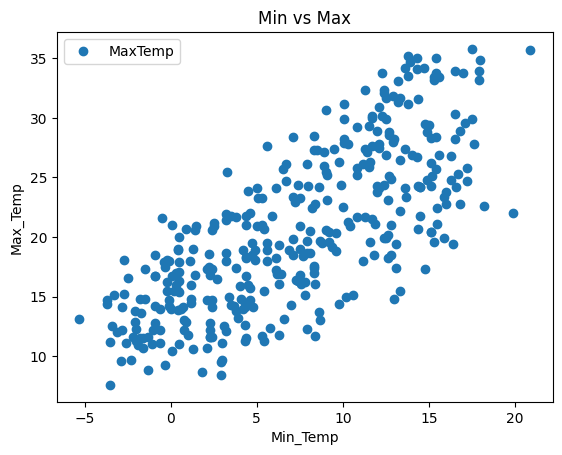

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Mostrar las primeras filas del dataset
print("Datos Fichero: ",dataset.shape) # número de filas y columnas
print(dataset.describe())
#Gráfica
plt.plot(dataset['MinTemp'], dataset['MaxTemp'],'o', label='MaxTemp')
plt.title('Min vs Max')
plt.xlabel('Min_Temp')
plt.ylabel('Max_Temp')
plt.legend(loc='upper left')
plt.show()

ENTRENAMIENTO Y TESTEO

Calculo Parametros:[14.56202411]
El Coeficiente es :[[0.81953755]]
La Predicción:[[23.41302965]
 [13.08685652]
 [27.26485614]
 [25.46187353]
 [26.93704112]
 [20.0529257 ]
 [29.31370001]
 [13.82444032]
 [17.43040554]
 [19.56120317]
 [20.87246325]
 [25.21601226]
 [16.44696048]
 [16.44696048]
 [13.33271779]
 [16.36500672]
 [16.52891423]
 [22.01981582]
 [20.62660198]
 [23.98670594]
 [24.06865969]
 [18.08603558]
 [27.18290238]
 [14.56202411]
 [14.3981166 ]
 [12.43122648]
 [28.08439369]
 [26.36336483]
 [24.970151  ]
 [15.79133044]
 [22.83935337]
 [21.85590831]
 [24.72428973]
 [28.08439369]
 [23.82279843]
 [19.64315692]
 [25.8716423 ]
 [25.46187353]
 [12.7590415 ]
 [28.2483012 ]
 [14.31616285]
 [14.97179289]
 [13.82444032]
 [15.62742293]
 [27.10094863]
 [17.92212807]
 [15.05374664]
 [18.33189684]
 [13.33271779]
 [24.47842847]
 [19.15143439]
 [18.08603558]
 [15.29960791]
 [20.38074072]
 [27.67462491]
 [22.5934921 ]
 [22.10176957]
 [25.8716423 ]
 [29.23174626]
 [29.23174626]
 [17.18454427]
 [13

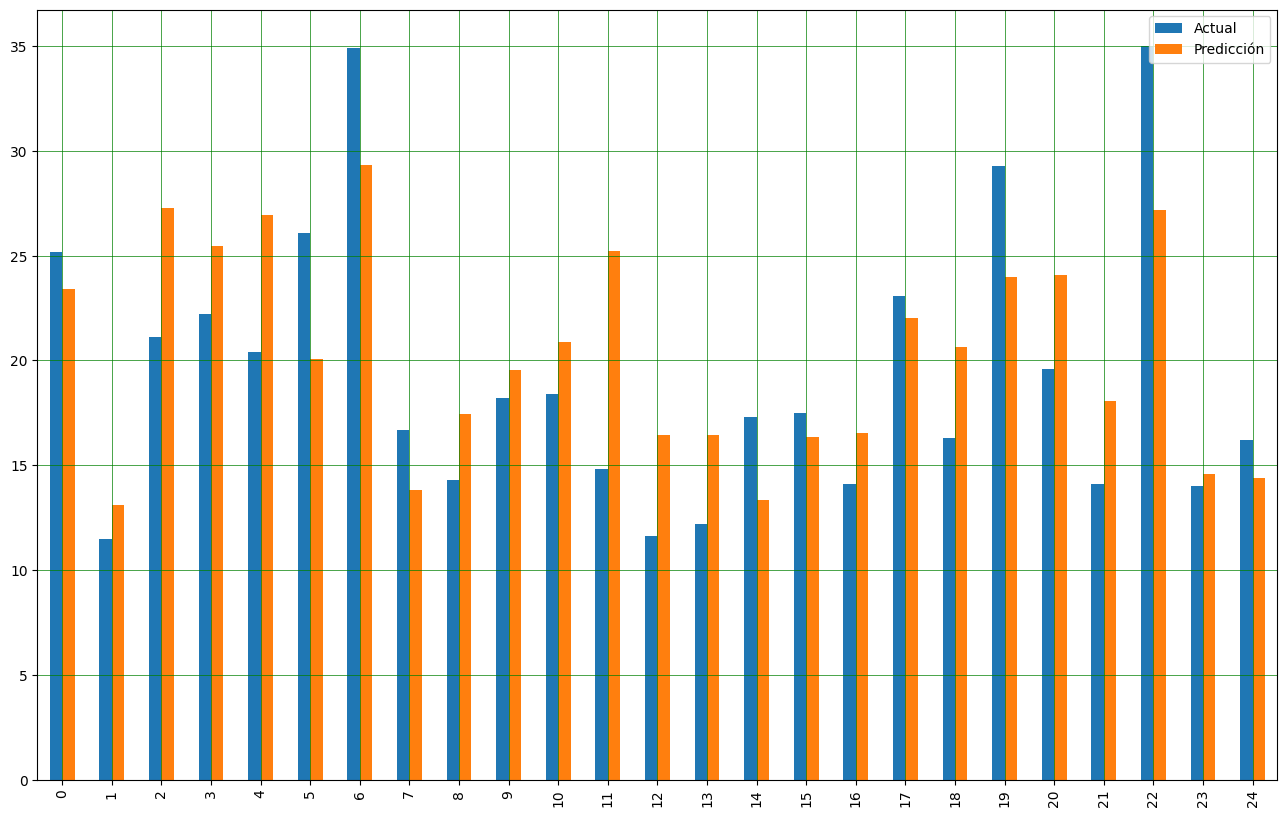

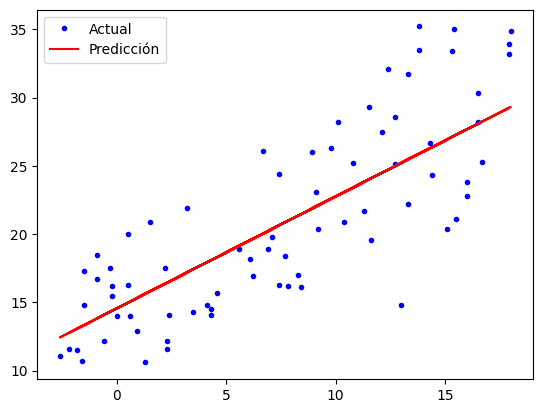

Error Cuadrático Medio (MSE) es: 17.011877668640622
Error Absoluto Medio (MAE) es: 3.5094353112899594
La Raíz^2 (MSE) es: 4.124545753006096
Precision Prueba de determinación del conjunto de prueba: 0.6412725627854521


In [96]:
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#ENTRENAMIENTO
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train) #variables de entrada

#TESTEO
print(f"Calculo Parametros:{regressor.intercept_}")
print(f"El Coeficiente es :{regressor.coef_}")
print(f"La Predicción:{regressor.predict(x_test)}")

#CONVERTIMOS A DATAFRAM PARA REALIZAR LOS CÁLCULOS
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual':y_test.reshape(-1),'Predicción':y_pred.reshape(-1)})
print(df)

#GRÁFICAMOS
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.legend(loc='upper right')

fig,ax = plt.subplots()
plt.plot(x_test,y_test,"b.",label='Actual') #Datos
plt.plot(x_test,y_pred,"r-",label='Predicción') #Hipótesis
plt.legend(loc='upper left')
plt.show()

#Cálculo del error cuadrático (MSE)  para evaluar la calidad del modelo
mse = mean_squared_error(y_test,y_pred)
print("Error Cuadrático Medio (MSE) es:",mse)

#Calculo del error Absoluto Medio (MAE) promedio entre los valores predichos y los valores reales.
mae = mean_absolute_error(y_test,y_pred)
print("Error Absoluto Medio (MAE) es:",mae)

#Cálculo de la Raíz^2 de (MSE)
r2 = np.sqrt(mse)
print("La Raíz^2 (MSE) es:",r2)

#Cálculo de coeficiente de determinación (R2)
coef = r2_score(y_test, y_pred)
print(f"Precision Prueba de determinación del conjunto de prueba: {coef}")